# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

**Примечание:** в начале любого исследования считаю необходимым оставлять легенду. Пригодится, если когда-то придется к нему вернуться или кто-то другой будет работать с кодом.

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv' ,sep="\t")
display(data.head(10))
display(data.tail(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Первичный просмотр данных не состоялся, по причине того, что "слиплись" данные в одну строку. "\t", находится на месте "пробела". Поэтому, установим разделение по этому символу и данные станут читаемы.

При просмотре сразу бросается в глаза огромное количество пропусков, даже не прибегая к методам Pandas. Также, велика вероятность того, что не все из столбцов потребуются при решении поставленных вопросов и к ним придется обращаться к работе с данными.

Изучены типы данных с помощью команды info.

Существуют столбцы, где тип данных не совсем корректно позволит решить задачу. Например в столбце с балконами это число с плавающей точкой - не бывает, условно, 1,5 балкона. Или этажность в доме - там аналогичная неточность в типе данных.

Дальнейшие шаги исследования: понять, какие столбы будут "жизненно необходимы", устранить проблемы с пропусками/нелогичными значениями, и.т.п. После чего с "пригодными" данными осуществить необходимые расчеты, чтобы получить достоверный результат.

## Предобработка данных

In [4]:
data.isna().sum().sort_values(ascending = False) # посмотрим, в каком столбце сколько пропусков и отсортируем в порядке убывания

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Начнем устранять пропуски в том же порядке: от столбцов с наиболее пропущенных значений к наименьшим.

**Аннотация:** чтобы код был более лаконичным, стоит совместить "борьбу с пропусками" и изменением типа данных, там где это требуется.

"is_apartment" - Логично предположить, что пропуски в этом столбце говорят о том, что объект не относится к аппартаментам. Правильнее указать 0, т.е. к этому виду недвижимости объект не относится. Подтверждает эту теорию, что больше всего пропусков именно в этом столбце, а в реальности аппартаменты достаточно редки. 

В аннотации к проекту указан тип bool, что было бы логично при таких значениях, но сейчас он float64. Заодно, преобразуем в правильный тип и перезапишем столбец.

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(0) #заменить пропуски нулями
data['is_apartment'] = data['is_apartment'].astype('bool') #изменим тип данных
data['is_apartment'].isna().sum() #проверим. Если 0 - сработало

0

В столбце с балконами стоит заменить пропуски нулем - предположим, что в этих объектах недвижимости балкон отсутствует. Это логично, т.к. бывают квартиры без балкона, коммуналки/общежития, либо перепланированные квартиры, где балкон объединен с другим помещением. Также, заменим float на int

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int64')
data['balcony'].isna().sum()

0

Пропуски в ceiling_height заменим медианными значениями. Если исходить с того, что в среднем в жилых помещениях потолки начинаются от 2,5 метров, а в сталинках, если не изменяет память, около 3,2, медиана не должна исказить картину. Тип данных тут правильный, округление до целого числа будет очень грубым

In [7]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

Расстояние до центра заполним характерными для населенных пунктов значением, т.е. "устраним" только те пропуски, где это возможно

In [8]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
data['cityCenters_nearest'].isna().sum()

5394

Пропуски в parks_around3000, в отличии от ситуации с расстоянием можно заменить нулем - все-таки парки есть далеко не везде

In [9]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isna().sum()

0

В ponds_around3000 поступим полностью аналогично.

In [10]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].isna().sum()

0

Столбец kitchen_area также потребуется для расчетов, прямой зависимости между другими данными не прослеживается, например, нет связи, между этажностью дома и площадью кухни. Возможно, она была бы в зависимости от года подстройки - в современных домах кухни больше.

Попробуем заполнить пропуски средним значением в зависимости от общей площади квартиры.

In [11]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median()) #после применения первой строки осталось 205 пропусков, заполним медианным значением столбца
data['kitchen_area'].isna().sum()

# второй этап заполнения пропусков не должен сильно исказить результат. Итог "работы" метода transform = 9.8, а медианное значение столбца = 10.5

0

С пропусками в столбце с жилой площадью можно поступить также, связь жилой площади от суммарной очевидна

In [12]:
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].transform('median'))
data['living_area'] = data['living_area'].fillna(data['living_area'].median()) #уберем оставшиеся 143 пропуска "общей" медианой
data['living_area'].isna().sum()

0

Значения "обычной медианы" и методом transform почти не отличаются, можно было сразу заполнить медианным значением столбца.

Пропуски во floors_total можно было бы заполнить медианой, но в этом нет смысла. Этажность квартиры - обязательный предмет, что просмотра объекта недвижимости, что последующей сделки и напрямую влияет на стоимость. Целесообразно удалить такие значения, они не исказят общую картину. 

Пропуски в locality_name мы тоже не можем каким-либо образом усреднить - также удалим. Применим метод dropna.

In [13]:
data.dropna(subset = ['floors_total', 'locality_name'], inplace = True)
data['floors_total'].isna().sum()
data['locality_name'].isna().sum()

0

Завершим предобработку данных изменением типов данных там, где это не было сделано:

In [14]:
data['floors_total'] = data['floors_total'].astype('int64') #не бывает дробного значения этажа

#first_day_exposition явно содержит данные datetime, тип object ошибочен. Изменим тип и зададим формат отображения даты. В качестве разделителя будем использовать "типовой" T
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

B последний штрих: по "правилам хорошего кода", не стоит использовать в наименованиях регистр, отличный от строчного, а также, выделять "новое слово", кроме как нижним подчеркиванием. Название столбца cityCenters_nearest содержит обе ошибки. Исправим это:

In [15]:
data = data.rename(columns={'cityCenters_nearest':'city_сenters_nearest'})

In [16]:
data.info() #проверим итоги предобработки

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [17]:
data.duplicated().sum() #явных дубликатов нет

0

### Вывод

В данных до проведения шага предобработки было огромное количество пропусков и указаны неверные типа данных. Причиной этому видятся как технологические ошибки (неудачные выгрузки/иные манипуляции с данными), так и человеческий фактор, полагаю, в равной степени. Например, не были заполнены значения столбца с балконами в одном ключе - кто-то указывал 0, т.к. балкона нет, а кто-то не указывал ничего - вот и получился пропуск.

Отсутствующие данные, скажем, в столбце с метражом кухни могли взяться из-за некорректного разделения данных. Условно, вынесли кухни с метражом более 15 м - на их месте образовались пропуски.

## Расчёты и добавление результатов в таблицу

#### Краткий план действий:
- Найти цену квадратного метра
- Установить день, месяц и год публикации объявления
- Произвести категоризацию по этажам, выделив первые и последние
- Установить соотношение жилой и общей площади, а также отношение площади кухни к общей.

Найдем цену квадратного метра. В принципе, решение очевидное, нужно разделить стоимость недвижимости на метраж. Здесь важно делить на полную площадь, а не на только жилую. Итоги расчета занесем в новый столбец - price_m.

In [18]:
data['price_m'] = data['last_price'] / data['total_area']
display(data['price_m'])

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_m, Length: 23565, dtype: float64

Для решения следующей задачи воспользуемся средствами работы с датой/временем Pandas. По итогу создам 3 новых столбца, содержащие день недели, месяц и год публикации объявления.

In [19]:
data['day_publication']=data['first_day_exposition'].dt.weekday #день недели публикации объявления
data['month_publication']=data['first_day_exposition'].dt.month #месяц
data['year_publication']=data['first_day_exposition'].dt.year #год
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,day_publication,month_publication,year_publication
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,95.00,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,NaN,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,44.30,22,False,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,NaN,0.0,NaN,0.0,NaN,189.0,87454.764777,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017


Для того, чтобы установить этаж квартиры, следует произвести категоризацию с помощью функции. Разделим этажи на первый, последний, другой. 

In [20]:
def floor_category(row): #объявляем функцию
    floor = row['floor'] #работаем со значениеми столбца floor
    high_floor = row['floors_total'] #за последний этаж принимаем значение, равное этажности дома
    if floor == 1:
        return 'Первый этаж'
    if floor == high_floor:
        return 'Последний этаж'
    return 'Другой этаж' #результат, если условие не соответствует вышеописанным

data['floor_category'] = data.apply(floor_category, axis=1) #создадим новый столбец с категоризацией и наполним его результатами работы функции
display(data) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m,day_publication,month_publication,year_publication,floor_category
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,Другой этаж
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,Первый этаж
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой этаж
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,95.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой этаж
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой этаж
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.845228,1,3,2017,Другой этаж
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,0.0,NaN,0.0,NaN,45.0,52542.372881,0,1,2018,Другой этаж
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0.0,NaN,0.0,NaN,NaN,44091.710758,6,2,2018,Первый этаж
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.0,12,False,...,2.0,173.0,3.0,196.0,602.0,149511.400651,1,3,2017,Другой этаж


В случае изменения постановки задачи, можно будет доработать функцию, следовательно, расширить категоризацию. Например: на рынке есть спрос именно "серединных этажей", т.е. 5-й из 10-ти - спрос может повлечь повышение стоимости. Или, если в районе открывается живописный вид, будет выше стоимость этажей, условно, с 12-го и выше.

Найдем также требуемые соотношения жилой площади к общему метражу и запишем в новый столбец.

In [21]:
data['ratio_living_area_total_area'] = data['living_area'] / data['total_area']
data['ratio_living_area_total_area']

0        0.472222
1        0.460396
2        0.612500
3        0.597484
4        0.320000
           ...   
23694    0.547792
23695    0.644068
23696    0.523810
23697    0.390879
23698    0.380805
Name: ratio_living_area_total_area, Length: 23565, dtype: float64

Аналогичным путем найдем соотношение площади кухни и общей площади.

In [22]:
data['ratio_kitchen_area_living_area'] = data['kitchen_area'] / data['living_area']
data['ratio_kitchen_area_living_area']

0        0.490196
1        0.591398
2        0.241983
3        0.157895
4        1.281250
           ...   
23694    0.188677
23695    0.223684
23696    0.282828
23697    0.776667
23698    0.731707
Name: ratio_kitchen_area_living_area, Length: 23565, dtype: float64

### Вывод

Были рассчитаны необходимые критерии, которые потребуются на следующей стадии исследования.

## Исследовательский анализ данных

#### Краткий план действий:
- Путем построения графиков изучить такие параметры, как: площадь, цена, число комнат, высота потолков
- Изучить время продажи квартиры
- Почистить данные от аномальных/некорректных значений
- Установить какие факторы влияют на ценообразование
- Найти 10 населенных пунктов с наиболее активным рынком недвижимости
- Определить центр города в зависимости от ценообразования и установить, что может влиять на стоимость квадратного метра.

#### Построим требуемые графики.

Поскольку, в рамках исследования потребуется несколько однотипных графиков, имеет смысл создать функцию, а при необходимости построения графика только передавать нужные параметры, не создавай новые ячейки/строки кода.

In [23]:
def graph_hist(columns, xmin, xmax): #функция для построения гистограмм. Передаем ей столбец из датафрейма и min/max по оси абсцисс
    data[columns].hist(bins=30, range=(xmin, xmax)) 

In [24]:
def graph_boxplot(columns, ymin, ymax): # функция для построения "ящика с усами"
    plt.ylim(ymin, ymax) # задаем пределы по оси ординат, для этого, воспользуемся библиотекоц matplotlib.pyplot
    data.boxplot(columns)

In [25]:
pd.options.display.float_format = '{:,.0f}'.format

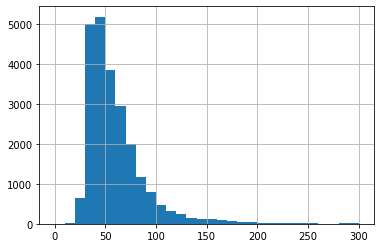

In [26]:
graph_hist('total_area', 0, 300) # посмотрим график для метража квартир от 0 до 300 метров

Видим пик количества квартир площадью ~45 метров, что логично. Вероятнее всего, это "однушки" или "двушки" в старом жилом фонде. Квартиры площадью 100 метров и более встречаются весьма редко, более 150 метров больше похожи на единичные значения.

Посмотрим, что покажет диаграмма размаха.

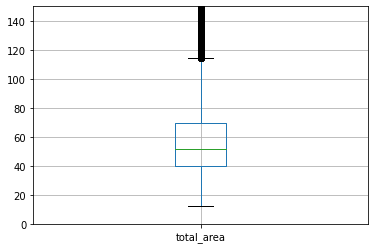

In [27]:
graph_boxplot('total_area', 0, 150) # посмотрим диапазон от 0 до 150

Наблюдается диапазон нормальных значений от ~15-17 метров до ~120 метров. Это логично, скорее всего, мы имеем дело с микроквартирами/коммуналками, которых не особенно много, а все что выше 120 метров - могут быть уже не квартиры, а коммерческие объекты. Воспользуемся полученными значениями и с помощью query "отсечем" метраж более 120 метров.

**Примечание:** для следующих параметров исследование будет проведено аналогичным образом.

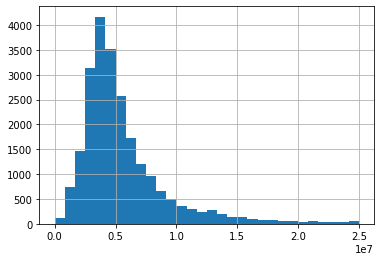

In [28]:
graph_hist('last_price', 0, 25000000) # посмотрим график по стоимости от нуля до 25 млн рублей

Пик набладется для значений в районе 3 млн рублей. Далее, следует "плавный" спад, после 15 млн значений почти нет.

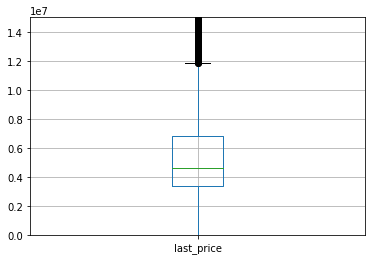

In [29]:
graph_boxplot('last_price', 0, 15000000) # посмотрим диапазон от 0 до 15000000

Нормальные значения от ~450000 тысяч до 11 миллионов. Целесообразно отказаться от значений более 11 млн.

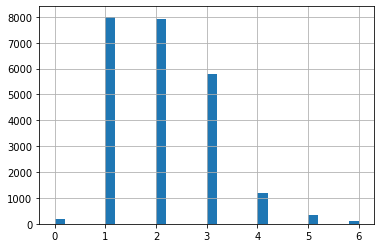

In [30]:
graph_hist('rooms', 0, 6) # посмотрим график количества комнат от 0 до 6

Больше всего 1-комнатных, 2-х комнатных чуть меньше. 3-к тоже есть, но в 2 раза меньше однушек. Все что дальше - встречается весьма редко, что в жизни тоже так. Единственное "но" - небольшие значения с нулем комнат. Двоякая ситуация. Предположим, это студии или коммуналки, где количество комнат не совсем уместная характеристика. Но это и не говорит о том, что комнат там 0. Откажемся от таких значений.

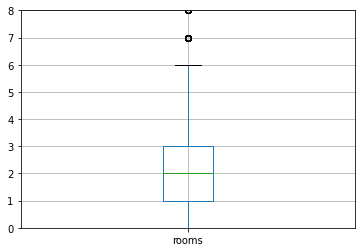

In [31]:
graph_boxplot('rooms', 0, 8) # увеличим кол-во комнат, например, до 8-и, посмотрим, что скажет от этом график

Подтвердился очевидный факт, значений свыше 6-ти будут нелогичны, хоть сейчас их и нет. Но, предположим в данных будут изменения и такие показатели появятся. Запуск кода решит эту проблему. "Отсекаем" квартиры более чем с 6-ю комнатами, плюс учтем решение отсечь "нулевые" комнаты.

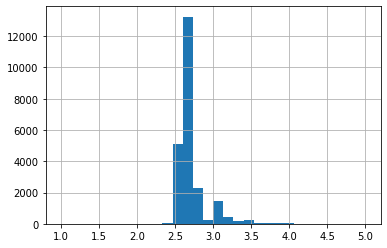

In [32]:
graph_hist('ceiling_height', 1, 5) #высота потолка точно не может быть равна 0, да 1,5 метра, например, тоже. Но, поищем аномальные значения.

Больше всего квартир имеют высоту потолка ~2.75 метра. Все соответствует реальности, небольшой всплеск значений более 3-х метров могут быть "сталинки" и различные индивидуальные решения, вроде двухэтажных квартир.

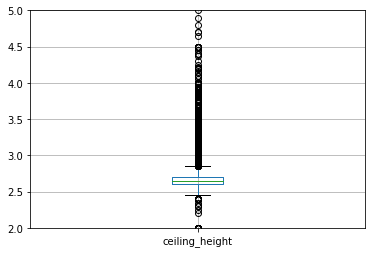

In [33]:
graph_boxplot('ceiling_height', 2, 5)

Значения больше ~2.8 метров считаются аномальными. Оставим небольшую "надежду", что это "сталинки" и "отсечем" все, что выше 3,5 метров. Нелогичными значениями также являются потолки менее 2,4 метра - тоже уберем.

#### Теперь изучим время продаж квартир и установим, как сделки проходят быстро, а какие наоборот.

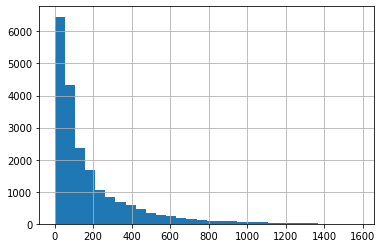

In [34]:
graph_hist('days_exposition', 0, 1580) #построим график, 1580 - максимальное значение столбца

Визуально, больше количество сделок проходит в срок до 100 дней со дня публикации объявления. Далее, наблюдается спад. После 600 дней объявления активны крайне редко. Более детально рассмотрим "пик" графика.

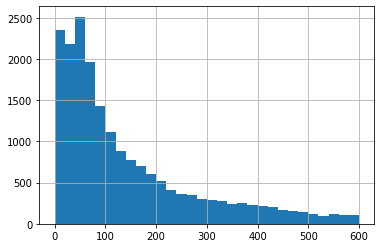

In [35]:
graph_hist('days_exposition', 0, 600)

Есть еще пик в районе 70 дней, но тоже соответствует логике. За 2 месяца реально прийти к соглашению и оформить все бумаги.

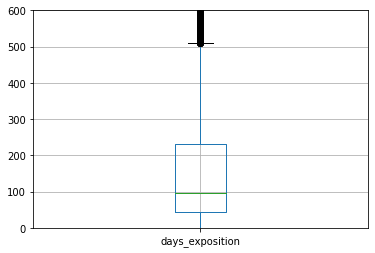

In [36]:
graph_boxplot('days_exposition', 0, 600)

#### Значения свыше ~510 дней считаются аномальными. Медианное же значение в районе 95-100 дней - логичный срок для поиска покупателя.

Посмотрим также "статистику" по столбцу.

In [37]:
data['days_exposition'].describe()

count   20,394
mean       181
std        220
min          1
25%         45
50%         95
75%        231
max      1,580
Name: days_exposition, dtype: float64

Минимальное значение - 1 день. Очень быстрая сделка, объект был продан в первый же день. Можно считать, что быстрая сделка - до 45 дней. Диапазон 45 до 193 дней условно назовем "нормальным" интервалом для продажи. Все, что больше - очень долгий срок продажи. В целом, есть некая вероятность продажи и 1580 дней - если объект не соответствует рыночной стоимости, а собственник не корректирует цену. Но это не является достоверным источником в рамках исследования, поэтому, отбросим значения более 510 дней.

In [38]:
data = data.query('total_area <=120')
data = data.query('last_price>400000 and last_price<=11000000')
data = data.query('rooms>=1 and rooms <6')
data = data.query('ceiling_height>=2.4 and ceiling_height <3.5')
data = data.query('days_exposition <=510')

#### Установим зависимость между стоимостью недвижимости и ее площадью.

<AxesSubplot:xlabel='last_price'>

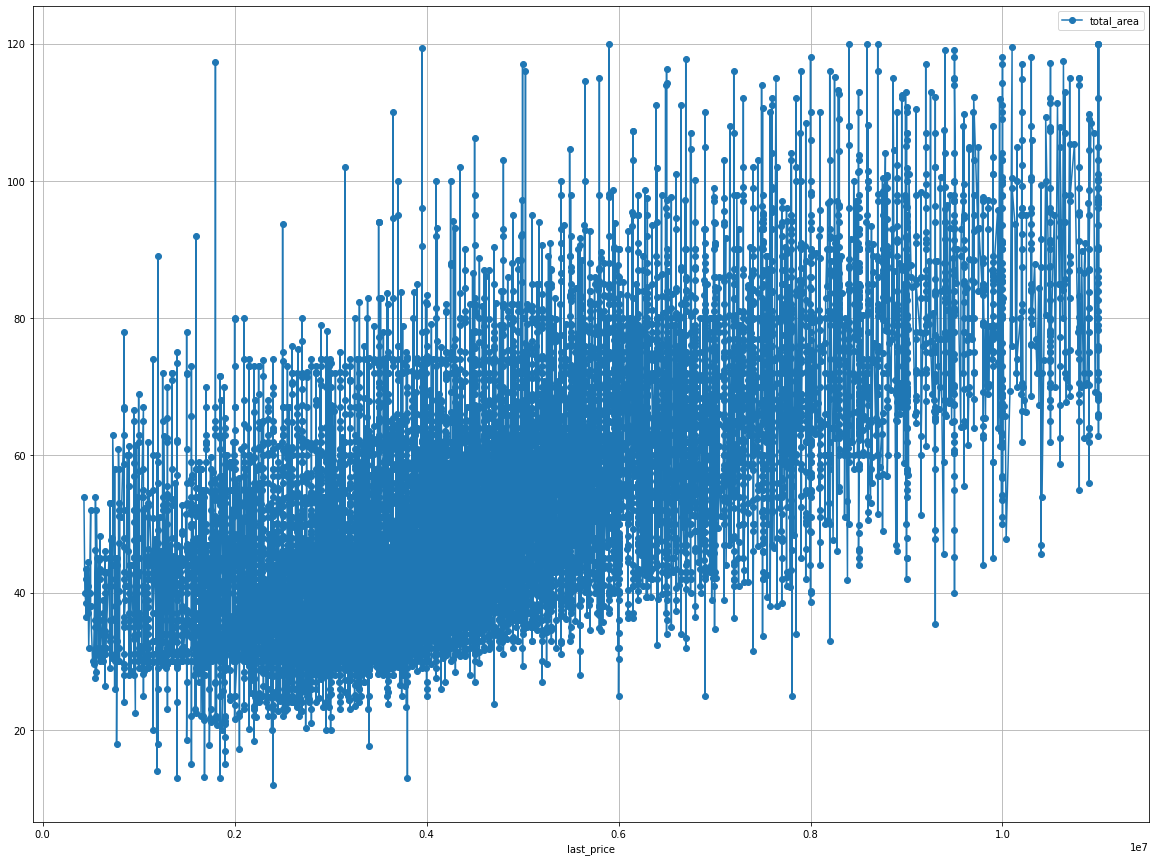

In [39]:
(data
    .sort_values(by='last_price') #сортируем столбец со стоимостью в порядке возрастания
    .plot(x='last_price',y='total_area',grid=True, style='o-',figsize=(20,15))
)

В зависимости от площади квартиры растет ее стоимость, что логично. Однако, можно проверить это с помощью корреляции - чем ближе результат к единице, тем сильнее зависимость.

In [40]:
data['last_price'].corr(data['total_area'])

0.6889357290939415

Корреляция также подтвердила гипотезу.

#### Установим зависимость между стоимостью недвижимости и количеством комнат.

<AxesSubplot:xlabel='rooms'>

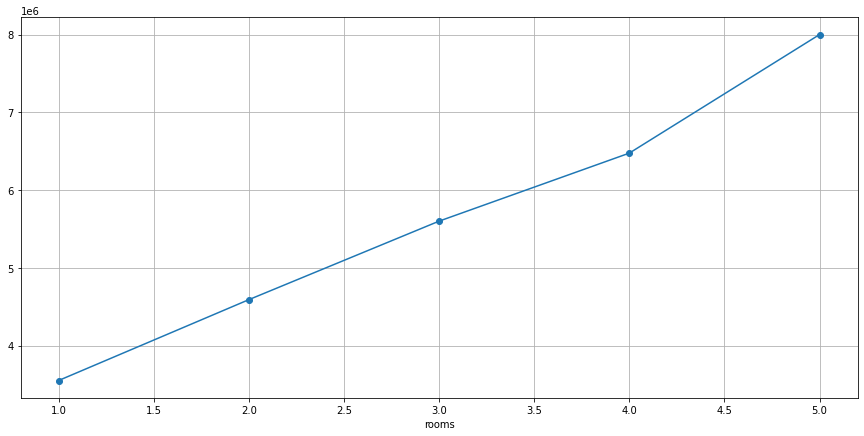

In [41]:
(data
     .groupby('rooms')['last_price'].median()  #сгруппируем количество комнат по цене и вычислим медиану
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,7))
)

График подтверждает очевидный факт: чем больше комнат, тем дороже квартира, как минимум потом, что больше комнат - больше и площадь, а эта зависимость была установлена на прошлом шаге.

In [42]:
data['last_price'].corr(data["rooms"])

0.4330207780880754

Имеется положительная корреляция, зависимость существует.

#### Установим зависимость между стоимостью недвижимости и удаленностью от центра

<AxesSubplot:xlabel='city_сenters_nearest'>

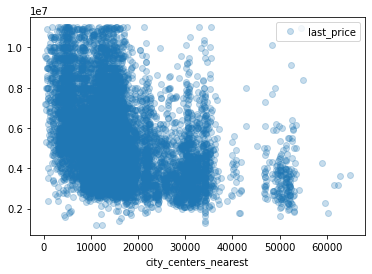

In [43]:
(data
     .sort_values(by='city_сenters_nearest')
     .plot(x='city_сenters_nearest',y='last_price',style='o',alpha=0.25)
)

Видим "скопление" дорогих квартир в центре города, что логично.

#### Установим зависимость между стоимостью недвижимости и удаленностью от центра.

На этом шаге потребуется тот столбец, которому ранее были переданы результаты функции по категоризации этажей.

<AxesSubplot:xlabel='floor_category'>

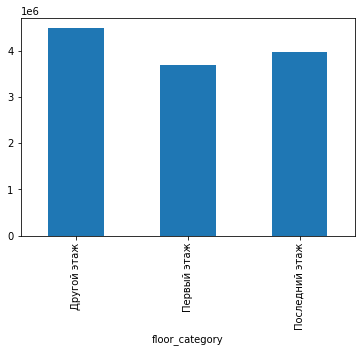

In [44]:
(data
    .groupby('floor_category')['last_price'].median()
    .plot(x='floor_category',y='last_price',kind='bar')
)

Результаты графика не противоречат логике: на реальном рынке недвижимости, первые и последние этажи всегда примерно на 10% ниже рынка. График свидетельствует, что самые дорогие - это "серединные" этажи, затем последние и самые дешевые - первые этажи.

In [45]:
data['floor'].corr(data['last_price'])

0.15427479863521343

Корреляция подтверждает, что прямой зависимости, как например цены от количества комнат нет, т.е. квартира на первом этаже не стоит, условно, в 2 раза меньше, чем на пятом этаже.

#### Установим зависимость между временными интервалами и ценами на недвижимость.

<AxesSubplot:xlabel='day_publication'>

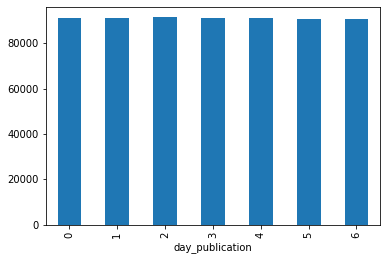

In [46]:
(data
     .groupby('day_publication')['price_m'].mean()
     .plot(x='day_publication',y='price_m',kind='bar')
)

Нет зависимости цены квадратного метра, от дня публикации.

<AxesSubplot:xlabel='month_publication'>

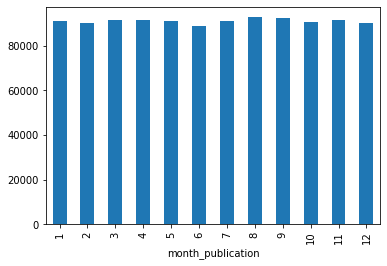

In [47]:
(data
     .groupby('month_publication')['price_m'].mean() # группируем по дню недели и цене и считаем количество
     .plot(x='month_publication',y='price_m',kind='bar')
)

Аналогично, цена "устойчиво" держится весь год, но можно сделать вывод, что рынок "проседает" в июне, видимо, из-за низкого спроса цена за метр снижается. Самые "высокие" цены на метр наблюдаются в августе-сентябре, в декабре несколько ближе, наверное из-за близости нового года и опасение не успеть закрыть сделку до больших выходных.

<AxesSubplot:xlabel='year_publication'>

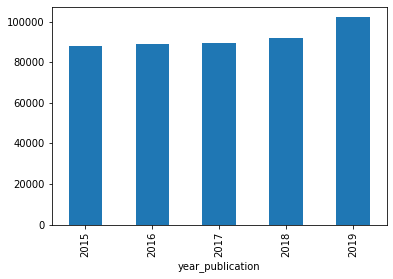

In [48]:
(data
     .groupby('year_publication')['price_m'].mean() 
     .plot(x='year_publication',y='price_m',kind='bar')
)

Прослеживается постепенный рост стоимости квадратного метра, в 2019 году произошел скачок. Рискну предположить, что это связано со скачком курса доллара. Общий же рост представляет собой инфляцию.

#### Найдем 10 населенных пунктов с наиболее оживленным рынком недвижимости:

In [49]:
max_publication = data.pivot_table(index='locality_name',values='price_m',aggfunc=['count','median']) #при формировании таблицы задим выполнение 2-х функций: подсчет значений и медианы
max_publication.columns = ['count', 'price_m_mean'] #получается двойное наименование столбца, вернем привычный вид
max_publication.sort_values(by='count',ascending=False).head(10) #сортировка по кол-ву значений в порядке убывания

,count,price_m_mean
locality_name,,
Санкт-Петербург,10796,"100,649"
посёлок Мурино,458,"84,801"
посёлок Шушары,381,"75,758"
Всеволожск,298,"65,483"
Колпино,291,"73,529"
посёлок Парголово,283,"91,328"
Пушкин,255,"97,403"
деревня Кудрово,252,"91,618"
Гатчина,240,"67,181"


<AxesSubplot:ylabel='count'>

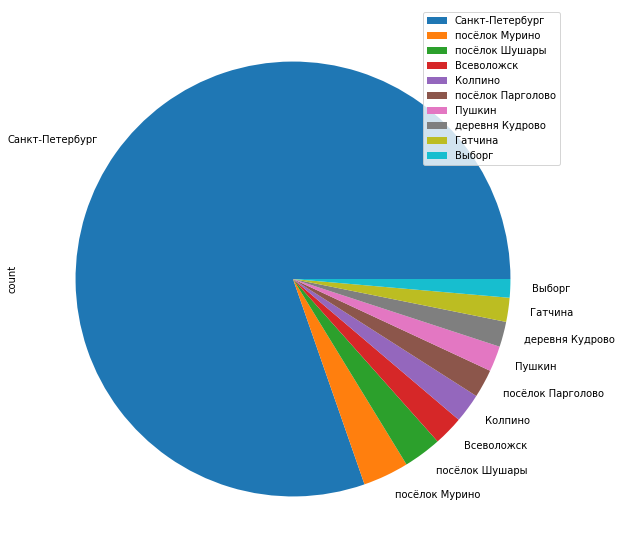

In [50]:
max_publication_graf = max_publication.sort_values(by='count',ascending=False).head(10)
max_publication_graf.plot(y='count', kind='pie', figsize=(10, 10))

Наиболее дорогая стоимость квадратного метра в Санкт-Петербурге, такая же пропорция, будет наблюдаться в любом регионе, где недвижимость в самом крупном городе сильно дороже, чем в других населенных пунктах. Больше всего объявлений тоже в Питере. Дешевле всего же метр стоит в Выборге, почти в 2 раза.

#### Определим, какая область входит в центр:

Прежде всего учтем, что в нужном столбце city_сenters_nearest данные идут в метрах, а центр будем определять в километрах. Чтобы не заменять столбец, который фигурировал во многих расчетах, создадим новый.

In [51]:
data['city_сenters_nearest_km'] = data['city_сenters_nearest'] / 1000 #переведем расстояние в километры
data['city_сenters_nearest_km'] = data['city_сenters_nearest_km'].round() #округлим с помощью метода round
data['last_price'] = data['last_price'] / 1000000 #цену переведем в миллионы

In [52]:
price_in_km = data.pivot_table(index='city_сenters_nearest_km', values='last_price', aggfunc=('mean'))
display(price_in_km.head(10))

,last_price
city_сenters_nearest_km,
0,7
1,8
2,8
3,7
4,7
5,7
6,7
7,6
8,6


<AxesSubplot:xlabel='city_сenters_nearest_km'>

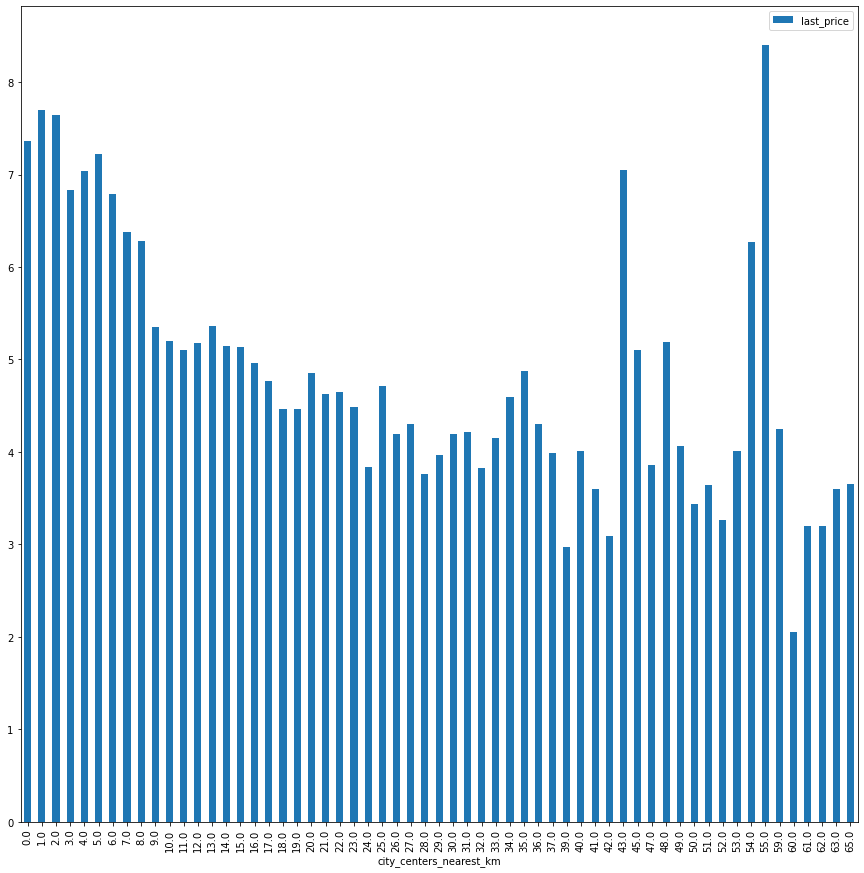

In [53]:
price_in_km.plot(y='last_price', kind='bar', figsize=(15, 15))

Наиболее "плотное" скопление квартир, стоимость которых почти не встречается в более удаленных районах, а именно, 8 миллионов и выше наблюдается в пределах ~5 километров, дальше значения тоже присутствуют, но встречаются реже. В центре цены на квартиры всегда выше, что и подтвеждает график. За центр стоит считать расстояние в 5 километров.

Нет смысла применять решение во всем датафрейме, если задача определить центр именно в Питере. С помощью query оставим только информацию по городу.

In [54]:
city_center = data.query('locality_name=="Санкт-Петербург"') #создаем новую переменную, т.к. "основной" датафрейм еще может понадобиться
city_center.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_m,day_publication,month_publication,year_publication,floor_category,ratio_living_area_total_area,ratio_kitchen_area_living_area,city_сenters_nearest_km
4,2,10,100,2018-06-19,2,3,14,32,13,False,...,48,121,"100,000",1,6,2018,Другой этаж,0,1,8
9,18,5,61,2017-02-26,3,2,9,44,7,False,...,NaN,289,"88,525",6,2,2017,Другой этаж,1,0,15
10,5,5,40,2017-11-16,1,3,12,20,3,False,...,553,137,"127,525",3,11,2017,Другой этаж,1,0,14
15,16,5,39,2017-11-18,1,3,14,20,5,False,...,296,19,"119,231",5,11,2017,Другой этаж,1,0,14
16,11,7,82,2017-11-23,3,3,5,56,1,False,...,NaN,397,"81,707",3,11,2017,Первый этаж,1,0,11
18,8,3,31,2017-01-27,1,2,5,19,2,False,...,NaN,168,"104,839",4,1,2017,Другой этаж,1,0,11
21,13,3,32,2018-03-14,1,3,5,17,2,False,...,NaN,310,"101,266",2,3,2018,Другой этаж,1,0,10
24,8,6,97,2015-10-31,2,3,3,46,1,False,...,124,265,"66,872",5,10,2015,Первый этаж,0,0,2
25,3,7,76,2015-10-01,2,3,23,39,18,False,...,564,300,"89,474",3,10,2015,Другой этаж,1,0,15
26,6,4,60,2017-04-28,4,3,5,43,4,False,...,95,265,"67,500",4,4,2017,Другой этаж,1,0,11


In [55]:
city_center = city_center.query('city_сenters_nearest_km < 5')
len(city_center) #узнаем количество оставшихся строк

619

#### Исследование квартир в центре

Нужно создать срез с двойным условием: смотреть квартиры только в центре и только в Санкт-Петербурге. Запишем его в новую переменную.

In [56]:
flats_in_center = data.query('city_сenters_nearest_km < 5 and locality_name=="Санкт-Петербург"')

In [57]:
def graph_hist_center(columns): # обновим функцию, для построения графиков по срезу
    flats_in_center[columns].hist(bins=30) 

In [58]:
flats_in_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_m,day_publication,month_publication,year_publication,floor_category,ratio_living_area_total_area,ratio_kitchen_area_living_area,city_сenters_nearest_km
24,8,6,97,2015-10-31,2,3,3,46,1,False,...,124,265,"66,872",5,10,2015,Первый этаж,0,0,2
99,32,10,90,2017-09-26,4,3,5,67,2,False,...,NaN,104,"106,667",1,9,2017,Другой этаж,1,0,3
136,16,6,52,2018-08-01,2,3,6,26,2,False,...,812,163,"125,483",2,8,2018,Другой этаж,0,0,4
138,8,5,40,2017-11-18,2,3,3,29,2,False,...,729,80,"120,000",5,11,2017,Другой этаж,1,0,3
291,10,6,70,2017-01-24,3,3,5,47,1,False,...,118,480,"84,286",1,1,2017,Первый этаж,1,0,4


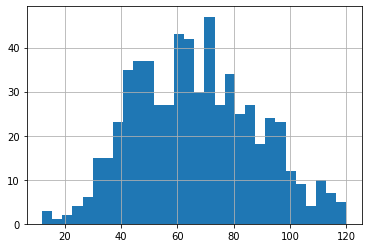

In [59]:
graph_hist_center('total_area')

Пик квартир в центре приходится на диапазон 60-70 метров. По всему датафрейму значение было 45-50. В центре более распространены большие квартиры.

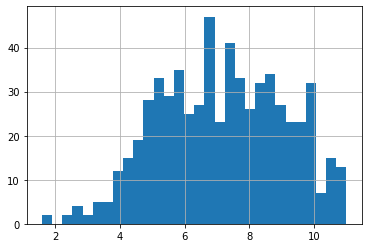

In [60]:
graph_hist_center('last_price')

Подтвердилось вполне очевидное предположение: квартиры в центре сильно дороже прочих - более, чем в 2 раза. Средняя стоимость по региону была около 3 млн, а на этом графике видим более 6 млн.

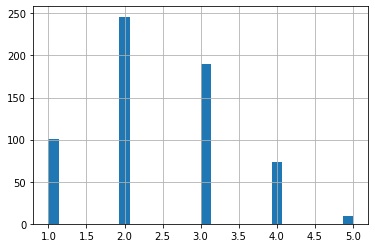

In [61]:
graph_hist_center('rooms')

Преобладают двухкомнатные квартиры. В исследовании региона больше всего было однушек. В центре их значительно меньше - примерно в 2 раза, по сравнению с двухкомнатными.

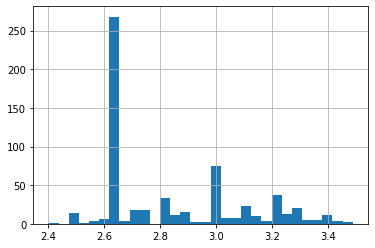

In [62]:
graph_hist_center('ceiling_height')

По высоте потолков особая разница не прослеживается - пики идентичны значениям по всему региону. Высота потолков в центре чуть меньше. Наверное, по причине большого количества исторических зданий.

Изучим зависимость количества комнат и стоимости.

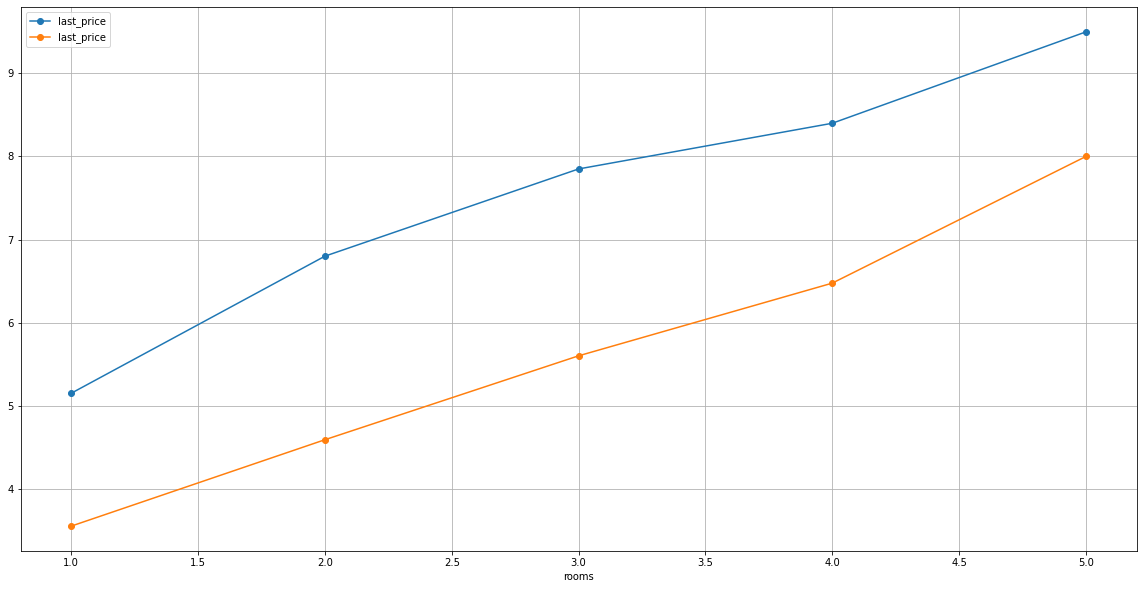

In [63]:
(flats_in_center
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True)
)


(data
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True)
)
plt.show()

Синяя линия на графике - это квартиры в центре, несколькими шагами ранее установили, что квартиры там сильно дороже. В остальном, зависимость идентичная - чем больше комнат, тем дороже квартира.

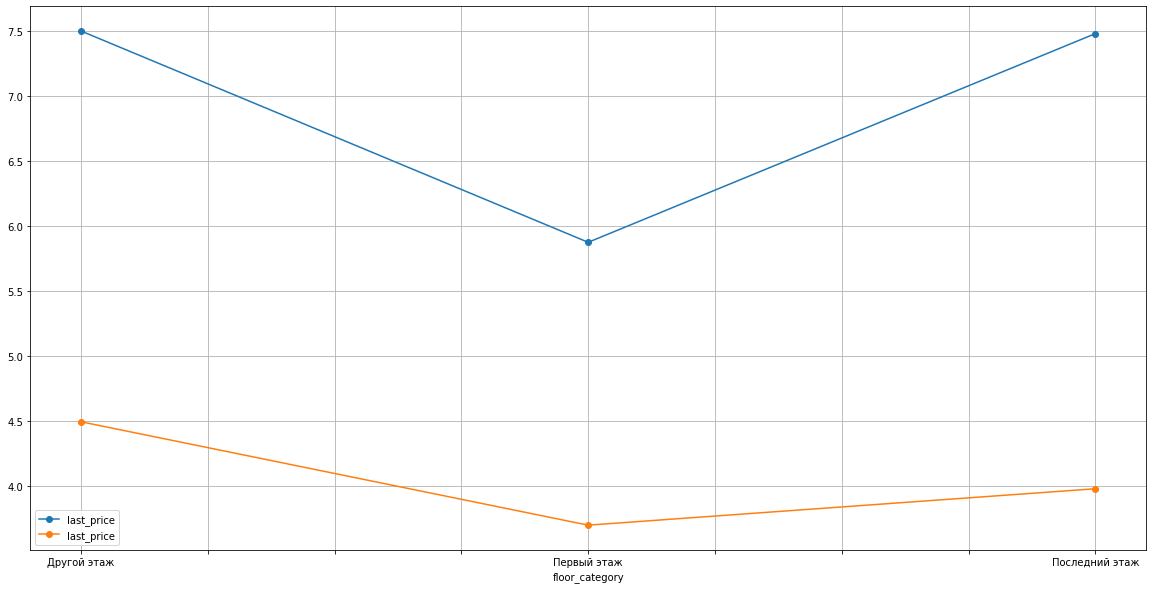

In [64]:
(flats_in_center
     .groupby('floor_category')['last_price'].median()
     .plot(x='floor_category',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True)
)


(data
     .groupby('floor_category')['last_price'].median()
     .plot(x='floor_category',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True)
)
plt.show()

В центре последний этаж стоит почти также, как и все прочие, за исключением первого. Нет такого "проседания" цены серединного этажа и последних, как во всех регионе. Значит, за последний этаж в центре люди готовы доплачивать.

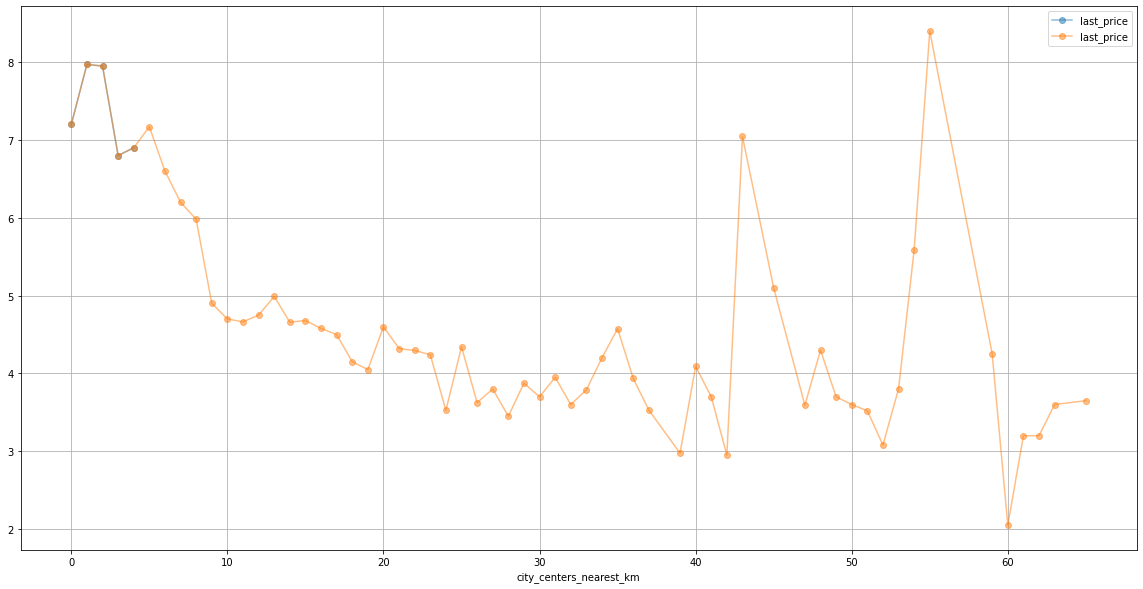

In [65]:
(flats_in_center
     .groupby('city_сenters_nearest_km')['last_price'].median()
     .plot(x='city_сenters_nearest_km',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True, alpha=0.5)
)


(data
     .groupby('city_сenters_nearest_km')['last_price'].median()
     .plot(x='city_сenters_nearest_km',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True, alpha=0.5)
)
plt.show()

"Скопление" дорогих квартир наблюдается на расстоянии 5 километров от центра. Подтверждаем, что расстояние от центра повышает стоимость квартир.

Целесообразно аналогичным образом построить графики по дню недели, месяцу и году публикации объявления - посмотреть зависимость для каждого.

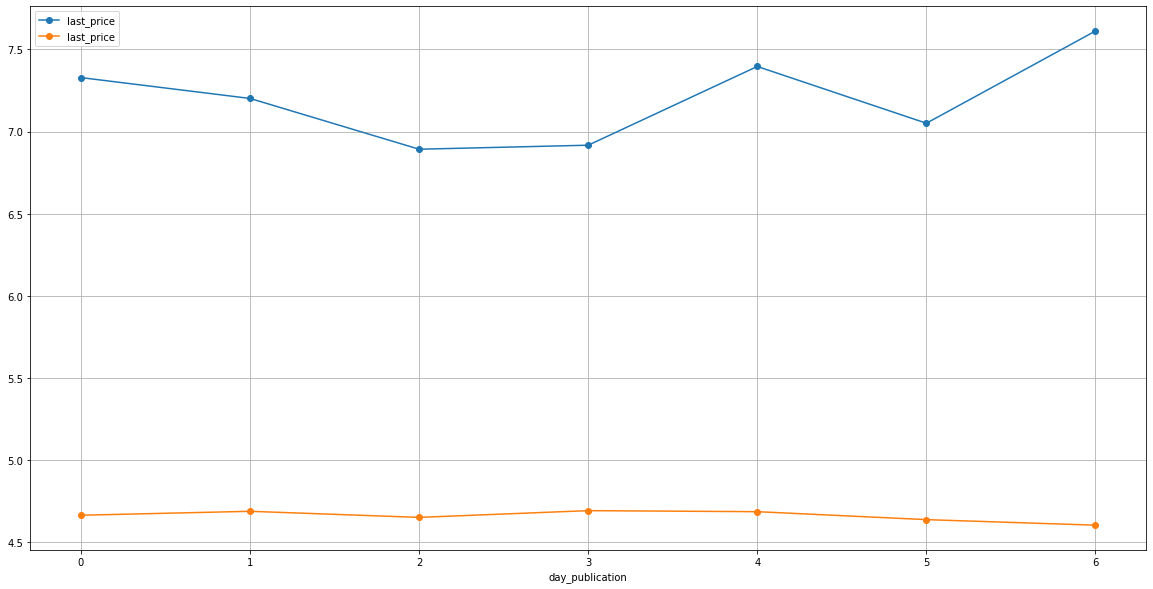

In [66]:
(flats_in_center
     .groupby('day_publication')['last_price'].mean()
     .plot(x='day_publication',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True)
)


(data
     .groupby('day_publication')['last_price'].mean()
     .plot(x='day_publication',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True)
)
plt.show()

В отличии от графика по региону видим, что в центре, в конце недели, наблюдается подъем стоимости.

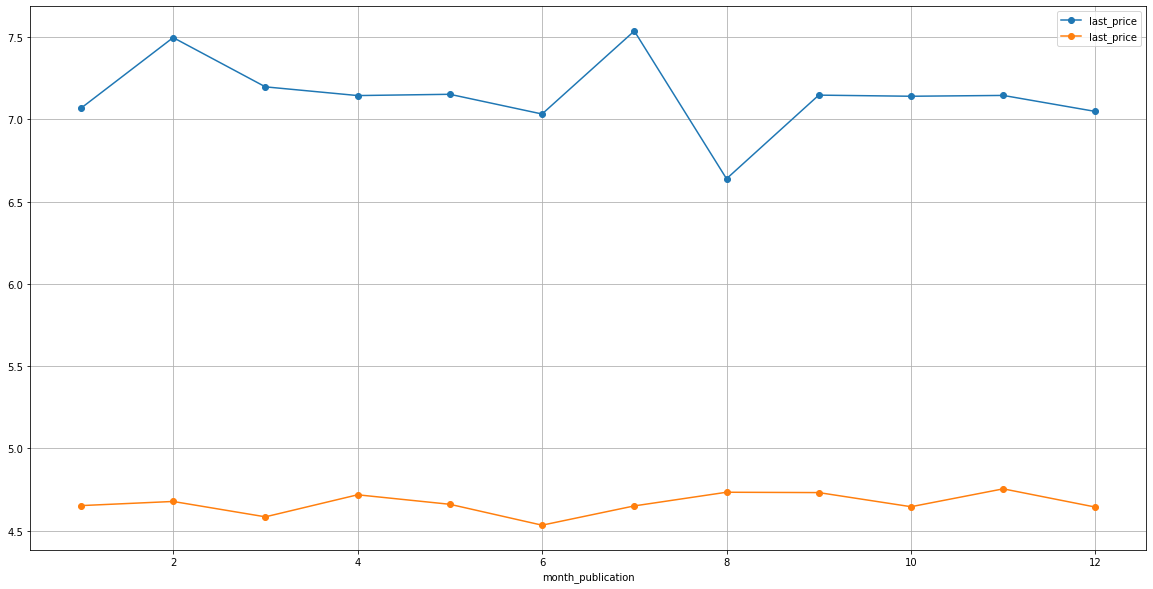

In [67]:
(flats_in_center
     .groupby('month_publication')['last_price'].mean()
     .plot(x='month_publication',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True)
)


(data
     .groupby('month_publication')['last_price'].mean()
     .plot(x='month_publication',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True)
)
plt.show()

В целом, поведение графиков имеет схожие значения, но у квартир в центре города больше "перепады". Также, в июне на рынке "затишье", в июле-августе "подъем", а в декабре также спад.

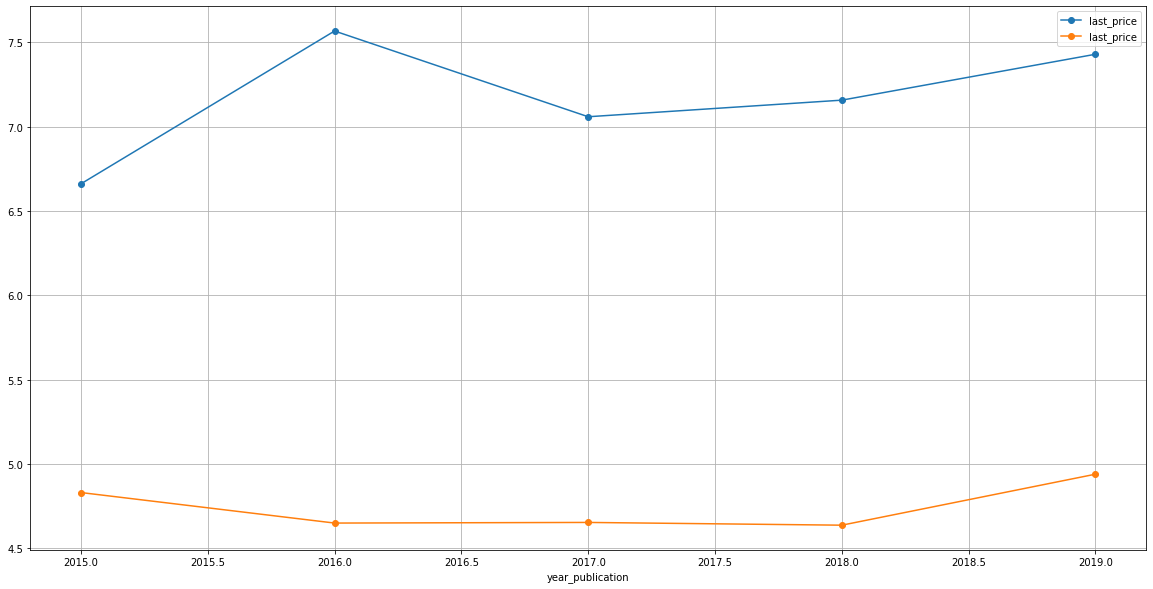

In [68]:
(flats_in_center
     .groupby('year_publication')['last_price'].mean()
     .plot(x='year_publication',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True)
)


(data
     .groupby('year_publication')['last_price'].mean()
     .plot(x='year_publication',y='last_price',style='o-',figsize=(20,10), legend=True, grid=True)
)
plt.show()

В 2016 году цены в центре достигли своего максимума, затем снизились. С 2018 года наблюдается рост цены, как и по всему региону.

### Вывод

В ходе выполнения исследовательского анализа данных был установлен ряд соответствий, влияющих на формирование цены объекта недвижимости. Все полученные гипотезы соответствуют реальным данным: на реальном рынке недвижимости можно получить точно такие же зависимости: например, что в центре квартиры дороже, также как и областной центр задает максимальную цену на квадратный метр в регионе.

## Общий вывод

В исходных данных прослеживались проблемы с пропусками и нелогичными значениями. Однозначно, нельзя сказать, что квартиру нельзя продавать за 12500 рублей, также как и объявление активно более 1500 дней, но такие значения являются аномальными и очень сильно "выбиваются из общего ряда". Также, были установлено, что цена за квадратный метр меняется в зависимости от количества комнат, высоты потолка, местоположения объекта, и.т.п. Изучено, какое количество квартир с различным числом комнат находится в продаже, как в центре города, так и во всем регионе, какова средняя стоимость квартир и как долго, в среднем, активны объявления до момента совершения сделки.

**Резюмируя:**

- В среднем, сделки проходят в течение 100 дней с момента выхода на рынок (публикации объявления)
- Чем больше в квартире комнат, равно как и метраж, тем выше ее стоимость
- Самая высокая цена квадратного метра наблюдается в Санкт-Петербурге, в свою очередь, в центе Санкт-Петербурга цена выше, чем в более удаленных районах
- В течение года цена за квадратный метр может меняться, само-собой не многократно. Это объясняется падением спроса или же, наоборот, увеличением
- Наиболее дорогах недвижимость находится в радиусе 5 километров от центра города
- Менее всего на рынке востребованы первые этажи, причем, вне зависимости от города/района
- "Поведение" цен на квартиры в центре и за его пределами во многом схожи.

#### Спасибо за внимание!